# PROBLEM STATEMENT

Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan.
To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data 
on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Classification_Loan_Default (1).csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,0,122508,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,1U,2400.0,EQUI,820,EXP,NaN,to_inst,NaN,direct,1
1,1,25685,50575,cf,Male,nopre,type1,p3,l1,nopc,...,1U,11160.0,CRIF,523,CIB,NaN,not_inst,80.292479,direct,1
2,2,63991,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,...,1U,NaN,EXP,832,CIB,47.0,to_inst,82.035176,direct,0
3,3,144321,169211,ncf,Female,pre,type1,p3,l1,nopc,...,1U,8700.0,CRIF,847,CIB,54.0,to_inst,59.365443,direct,1
4,4,37842,62732,cf,Joint,nopre,type2,p3,l2,nopc,...,1U,12180.0,CIB,573,EXP,53.0,not_inst,84.251412,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,22295,46947,71837,cf,Sex Not Available,nopre,type1,p4,l1,nopc,...,1U,2820.0,EXP,880,EXP,37.0,to_inst,48.766447,direct,0
22296,22296,93736,118626,cf,Male,nopre,type1,p4,l1,nopc,...,1U,3900.0,CIB,730,CIB,41.0,not_inst,67.857143,direct,0
22297,22297,41853,66743,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,1U,3480.0,CIB,676,CIB,50.0,to_inst,76.006711,direct,0
22298,22298,22856,47746,cf,Male,nopre,type2,p1,l1,nopc,...,1U,5340.0,EXP,844,CIB,51.0,not_inst,91.330645,direct,0


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,0,122508,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,1U,2400.0,EQUI,820,EXP,NaN,to_inst,NaN,direct,1
1,1,25685,50575,cf,Male,nopre,type1,p3,l1,nopc,...,1U,11160.0,CRIF,523,CIB,NaN,not_inst,80.292479,direct,1
2,2,63991,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,...,1U,NaN,EXP,832,CIB,47.0,to_inst,82.035176,direct,0
3,3,144321,169211,ncf,Female,pre,type1,p3,l1,nopc,...,1U,8700.0,CRIF,847,CIB,54.0,to_inst,59.365443,direct,1
4,4,37842,62732,cf,Joint,nopre,type2,p3,l2,nopc,...,1U,12180.0,CIB,573,EXP,53.0,not_inst,84.251412,direct,0


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
22295,22295,46947,71837,cf,Sex Not Available,nopre,type1,p4,l1,nopc,...,1U,2820.0,EXP,880,EXP,37.0,to_inst,48.766447,direct,0
22296,22296,93736,118626,cf,Male,nopre,type1,p4,l1,nopc,...,1U,3900.0,CIB,730,CIB,41.0,not_inst,67.857143,direct,0
22297,22297,41853,66743,cf,Sex Not Available,nopre,type1,p3,l1,nopc,...,1U,3480.0,CIB,676,CIB,50.0,to_inst,76.006711,direct,0
22298,22298,22856,47746,cf,Male,nopre,type2,p1,l1,nopc,...,1U,5340.0,EXP,844,CIB,51.0,not_inst,91.330645,direct,0
22299,22299,58653,83543,cf,Sex Not Available,nopre,type2,p3,l1,nopc,...,1U,2100.0,EQUI,829,EXP,60.0,to_inst,NaN,direct,1


In [6]:
df.shape

(22300, 33)

In [7]:
df.size

735900

In [8]:
##There are 34 feature in this dataset and DataFrame is not displaying all of them.
# To solve this we can set number of columns we want to display with pandas settings as shown in the cell below:

pd.set_option("display.max_columns", df.shape[-1]) 
df.head(10)

,Unnamed: 0.1,Unnamed: 0,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,0,122508,147398,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,2400.0,EQUI,820,EXP,NaN,to_inst,NaN,direct,1
1,1,25685,50575,cf,Male,nopre,type1,p3,l1,nopc,nob/c,576500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,718000.0,sb,pr,home,1U,11160.0,CRIF,523,CIB,NaN,not_inst,80.292479,direct,1
2,2,63991,88881,cf,Sex Not Available,pre,type3,p4,l1,nopc,nob/c,326500,3.990,0.2570,0.00,360.0,not_neg,not_int,not_lpsm,398000.0,sb,pr,home,1U,NaN,EXP,832,CIB,47.0,to_inst,82.035176,direct,0
3,3,144321,169211,ncf,Female,pre,type1,p3,l1,nopc,nob/c,776500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,1308000.0,sb,pr,home,1U,8700.0,CRIF,847,CIB,54.0,to_inst,59.365443,direct,1
4,4,37842,62732,cf,Joint,nopre,type2,p3,l2,nopc,b/c,596500,4.625,1.0186,0.00,360.0,not_neg,not_int,not_lpsm,708000.0,sb,pr,home,1U,12180.0,CIB,573,EXP,53.0,not_inst,84.251412,direct,0
5,5,117529,142419,cf,Sex Not Available,nopre,type2,p1,l1,nopc,b/c,286500,4.125,1.1620,4439.86,360.0,not_neg,not_int,not_lpsm,298000.0,sb,pr,home,1U,4920.0,EXP,617,CIB,44.0,to_inst,96.140940,direct,0
6,6,124052,148942,cf,Female,nopre,type1,p4,l1,nopc,nob/c,436500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,4680.0,CRIF,841,CIB,49.0,to_inst,71.792763,direct,1
7,7,10715,35605,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,266500,4.125,0.5519,3748.32,360.0,not_neg,not_int,not_lpsm,678000.0,sb,ir,home,2U,8160.0,CRIF,779,EXP,45.0,not_inst,39.306785,direct,0
8,8,126046,150936,cf,Female,nopre,type1,p4,l1,nopc,nob/c,266500,3.250,-0.3068,2228.26,360.0,not_neg,not_int,not_lpsm,578000.0,sb,pr,home,1U,5520.0,CRIF,761,CIB,39.0,not_inst,46.107266,direct,0
9,9,35517,60407,cf,Male,nopre,type1,p4,l1,nopc,nob/c,336500,3.990,0.4891,4703.14,360.0,not_neg,not_int,not_lpsm,458000.0,sb,pr,home,1U,4800.0,CIB,794,CIB,37.0,not_inst,73.471616,direct,0


In [9]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,Age,LTV,Status
count,22300.000000,22300.000000,22300.000000,2.230000e+04,16877.000000,16840.000000,16414.000000,22297.000000,2.006900e+04,20990.000000,22300.000000,22281.000000,20069.000000,22300.000000
mean,11149.500000,74604.745202,99494.745202,3.309291e+05,4.053078,0.443284,3198.788559,335.251783,4.986159e+05,6985.523583,700.354170,42.613797,72.772953,0.244843
std,6437.599837,42719.077600,42719.077600,1.827137e+05,0.568405,0.516256,3208.040787,58.294289,3.738144e+05,6527.140125,116.185578,10.918767,57.953254,0.430004
min,0.000000,6.000000,24896.000000,2.650000e+04,2.250000,-1.084100,0.000000,96.000000,8.000000e+03,0.000000,500.000000,24.000000,0.967478,0.000000
25%,5574.750000,37859.250000,62749.250000,1.965000e+05,3.625000,0.073900,577.572500,360.000000,2.780000e+05,3720.000000,599.000000,33.000000,60.416667,0.000000
50%,11149.500000,75016.500000,99906.500000,2.965000e+05,3.990000,0.385900,2587.890000,360.000000,4.180000e+05,5700.000000,701.000000,43.000000,75.082237,0.000000
75%,16724.250000,111718.250000,136608.250000,4.365000e+05,4.500000,0.784150,4792.812500,360.000000,6.180000e+05,8580.000000,801.000000,52.000000,85.663842,0.000000
max,22299.000000,148669.000000,173559.000000,3.006500e+06,7.000000,2.147800,53485.780000,360.000000,1.650800e+07,312000.000000,900.000000,61.000000,7831.250000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               22300 non-null  int64  
 1   Unnamed: 0                 22300 non-null  int64  
 2   ID                         22300 non-null  int64  
 3   loan_limit                 21804 non-null  object 
 4   Gender                     22300 non-null  object 
 5   approv_in_adv              22163 non-null  object 
 6   loan_type                  22300 non-null  object 
 7   loan_purpose               22282 non-null  object 
 8   Credit_Worthiness          22300 non-null  object 
 9   open_credit                22300 non-null  object 
 10  business_or_commercial     22300 non-null  object 
 11  loan_amount                22300 non-null  int64  
 12  rate_of_interest           16877 non-null  float64
 13  Interest_rate_spread       16840 non-null  flo

In [11]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'loan_limit', 'Gender',
       'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness',
       'open_credit', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'Age', 'submission_of_application', 'LTV',
       'Security_Type', 'Status'],
      dtype='object')

In [12]:
df.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
ID                              0
loan_limit                    496
Gender                          0
approv_in_adv                 137
loan_type                       0
loan_purpose                   18
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5423
Interest_rate_spread         5460
Upfront_charges              5886
term                            3
Neg_ammortization              25
interest_only                   0
lump_sum_payment                0
property_value               2231
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       1310
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
Age                            19
submission_of_

In [13]:
df.nunique()

Unnamed: 0.1                 22300
Unnamed: 0                   22300
ID                           22300
loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    156
rate_of_interest                88
Interest_rate_spread         10938
Upfront_charges              10691
term                            23
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 259
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                         593
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
Age                 

DROPPING THE COLUMNS:

Credit Score: This varies between customers and has zero correlation between any of the columns.

Secured by: This is the collateral backing each loan. The column is very much skewed to home and would not benefit the model

ID: obviously we would not need this in predictiong

property value: This is mostly skewed below $250K and is directly linked to security type, hence if secured by goes, it goes.

construction type: This is correlated with security type, skewed as much and contain same distribution,hence it goes too.

Occupancy Type: The type of occupancy in the property, which would again have to go as it is highly skewed and does not tell us much about the status.

total_units: This tells us the total number of units in the home. It as well is highly skewed and does not tell us much about status

lump sump payment: Most loans were not paid back in lump sum making the column highly skewed and it tells us little about status of the payment

term: This refers to the loan term. Most loan terms are for 360 days, and others may act as a noise and status is distributed across all terms so we remove it


In [14]:
df.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0','Secured_by','ID','property_value','construction_type','occupancy_type','total_units','lump_sum_payment','Credit_Score','term',], axis='columns', inplace=True)

In [15]:
df.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'Neg_ammortization', 'interest_only', 'income',
       'credit_type', 'co-applicant_credit_type', 'Age',
       'submission_of_application', 'LTV', 'Security_Type', 'Status'],
      dtype='object')

In [16]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,Neg_ammortization,interest_only,income,credit_type,co-applicant_credit_type,Age,submission_of_application,LTV,Security_Type,Status
0,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,NaN,NaN,NaN,not_neg,not_int,2400.0,EQUI,EXP,NaN,to_inst,NaN,direct,1
1,cf,Male,nopre,type1,p3,l1,nopc,nob/c,576500,NaN,NaN,NaN,neg_amm,not_int,11160.0,CRIF,CIB,NaN,not_inst,80.292479,direct,1
2,cf,Sex Not Available,pre,type3,p4,l1,nopc,nob/c,326500,3.990,0.2570,0.00,not_neg,not_int,NaN,EXP,CIB,47.0,to_inst,82.035176,direct,0
3,ncf,Female,pre,type1,p3,l1,nopc,nob/c,776500,NaN,NaN,NaN,not_neg,not_int,8700.0,CRIF,CIB,54.0,to_inst,59.365443,direct,1
4,cf,Joint,nopre,type2,p3,l2,nopc,b/c,596500,4.625,1.0186,0.00,not_neg,not_int,12180.0,CIB,EXP,53.0,not_inst,84.251412,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,296500,3.750,0.0654,NaN,not_neg,not_int,2820.0,EXP,EXP,37.0,to_inst,48.766447,direct,0
22296,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.625,-0.0630,0.00,not_neg,not_int,3900.0,CIB,CIB,41.0,not_inst,67.857143,direct,0
22297,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,226500,3.875,0.3674,6495.30,not_neg,not_int,3480.0,CIB,CIB,50.0,to_inst,76.006711,direct,0
22298,cf,Male,nopre,type2,p1,l1,nopc,b/c,226500,3.000,-0.1238,949.64,not_neg,not_int,5340.0,EXP,CIB,51.0,not_inst,91.330645,direct,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 21804 non-null  object 
 1   Gender                     22300 non-null  object 
 2   approv_in_adv              22163 non-null  object 
 3   loan_type                  22300 non-null  object 
 4   loan_purpose               22282 non-null  object 
 5   Credit_Worthiness          22300 non-null  object 
 6   open_credit                22300 non-null  object 
 7   business_or_commercial     22300 non-null  object 
 8   loan_amount                22300 non-null  int64  
 9   rate_of_interest           16877 non-null  float64
 10  Interest_rate_spread       16840 non-null  float64
 11  Upfront_charges            16414 non-null  float64
 12  Neg_ammortization          22275 non-null  object 
 13  interest_only              22300 non-null  obj

In [18]:
df.isnull().sum()

loan_limit                    496
Gender                          0
approv_in_adv                 137
loan_type                       0
loan_purpose                   18
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5423
Interest_rate_spread         5460
Upfront_charges              5886
Neg_ammortization              25
interest_only                   0
income                       1310
credit_type                     0
co-applicant_credit_type        0
Age                            19
submission_of_application      37
LTV                          2231
Security_Type                   0
Status                          0
dtype: int64

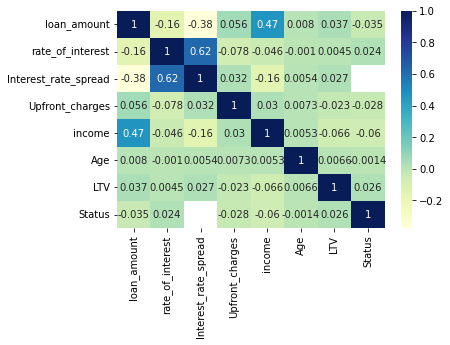

In [19]:
# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True)

# display the plot
plt.show()

coverting cat col to numeric col

In [20]:
df["loan_limit"].fillna( df["loan_limit"].mode()[0], inplace=True)
df["approv_in_adv"].fillna( df["approv_in_adv"].mode()[0], inplace=True)
df["loan_purpose"].fillna( df["loan_purpose"].mode()[0], inplace=True)
df["rate_of_interest"].fillna( df["rate_of_interest"].median(), inplace=True)
df["Interest_rate_spread"].fillna( df["Interest_rate_spread"].median(), inplace=True)
df["Upfront_charges"].fillna( df["Upfront_charges"].median(), inplace=True)
df["Neg_ammortization"].fillna( df["Neg_ammortization"].mode()[0], inplace=True)
df["income"].fillna( df["income"].median(), inplace=True)
df["Age"].fillna( df["Age"].median(), inplace=True)
df["submission_of_application"].fillna( df["submission_of_application"].mode()[0], inplace=True)
df["LTV"].fillna( df["LTV"].median(), inplace=True)




In [21]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
Neg_ammortization            0
interest_only                0
income                       0
credit_type                  0
co-applicant_credit_type     0
Age                          0
submission_of_application    0
LTV                          0
Security_Type                0
Status                       0
dtype: int64

In [22]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == "object":
        cat_cols.append(col)

# print the list of categorical column names
print("Categorical Columns:")
print(cat_cols)

Categorical Columns:
['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type']


In [23]:
dummies = pd.get_dummies(df[['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
                              'business_or_commercial', 'Neg_ammortization', 'interest_only', 'credit_type', 'co-applicant_credit_type',
                              'submission_of_application', 'Security_Type']])

# concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummies], axis=1)

# drop the original 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type' columns
df.drop(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type'], axis=1, inplace=True)

In [24]:
df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,income,Age,LTV,Status,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,...,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Security_Type_Indriect,Security_Type_direct
0,166500,3.990,0.3859,2587.89,2400.0,43.0,75.082237,1,1,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1
1,576500,3.990,0.3859,2587.89,11160.0,43.0,80.292479,1,1,0,0,0,1,0,1,0,...,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1
2,326500,3.990,0.2570,0.00,5700.0,47.0,82.035176,0,1,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
3,776500,3.990,0.3859,2587.89,8700.0,54.0,59.365443,1,0,1,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1
4,596500,4.625,1.0186,0.00,12180.0,53.0,84.251412,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,296500,3.750,0.0654,2587.89,2820.0,37.0,48.766447,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1
22296,446500,3.625,-0.0630,0.00,3900.0,41.0,67.857143,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1
22297,226500,3.875,0.3674,6495.30,3480.0,50.0,76.006711,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1
22298,226500,3.000,-0.1238,949.64,5340.0,51.0,91.330645,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1


In [25]:
df.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'income', 'Age', 'LTV', 'Status', 'loan_limit_cf',
       'loan_limit_ncf', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'credit_type_CIB', 'credit_type_CRIF',
       'credit_type_EQUI', 'credit_type_EXP', 'co-applicant_credit_type_CIB',
       'co-applicant_credit_type_EXP', 'submission_of_application_not_inst',
       'submission_of_application_to_inst', 'Security_Type_Indriect',
 

In [26]:
df.nunique()

loan_amount                             156
rate_of_interest                         88
Interest_rate_spread                  10939
Upfront_charges                       10692
income                                  593
Age                                      38
LTV                                    3867
Status                                    2
loan_limit_cf                             2
loan_limit_ncf                            2
Gender_Female                             2
Gender_Joint                              2
Gender_Male                               2
Gender_Sex Not Available                  2
approv_in_adv_nopre                       2
approv_in_adv_pre                         2
loan_type_type1                           2
loan_type_type2                           2
loan_type_type3                           2
loan_purpose_p1                           2
loan_purpose_p2                           2
loan_purpose_p3                           2
loan_purpose_p4                 

In [27]:
#train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None):

    # Check if input arrays have the same length
    assert len(X) == len(y)

    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test

In [28]:
X = df.drop(columns=['Status'], axis=1)
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(17840, 42)
(4460, 42)
(17840,)
(4460,)


In [30]:
## Model building for rfc without using sklearn library

import numpy as np
from collections import Counter    ## Counter class from the collections module is a useful tool for counting the frequency of elements in a list or any other iterable.

class Node:
  ##the feature, threshold, left, and right parameters define an internal node, and the value parameter defines a leaf node.
  ## The * before the value parameter indicates that it is a keyword-only argument, which means it can only be passed using its name.
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None): ## init is a method used to initialise the obj of a class.
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
 ## is_leaf_node is a member function of a class.is_leaf_node method is used to check if a particular node is a leaf node or not.
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

##fit is a member function of a class. x--i/pfeatures, y--target var
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

##The _grow_tree method is a recursive method that creates the decision tree by splitting the input data at each node based on the selected feature and threshold
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)     ##np.random.choice() is a func from the NumPy lib that randomly selects a specified no.of items

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


##_best_split that takes in an input dataset X, a target variable y, and a set of feature indices feat_idxs. 
##The purpose of this method is to find the best split point among all the candidate features and thresholds for a given set of features,
  
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:  ##feat_idxs is a numerical position of each of these feature in dataset
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


### method _information_gain that takes in a target variable y, a feature column X_column, and a threshold value.
## The purpose of this method is to calculate the information gain of a given split point based on the entropy of the parent node and the weighted average entropy of the child nodes.

  
    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        ##the method splits the data into left and right child nodes based on the specified threshold. 
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        ##Finally, the method calculates the information gain as the difference between the parent entropy and the child entropy.  
        information_gain = parent_entropy - child_entropy
        return information_gain

## The method first uses NumPy's argwhere function to find the indices of the samples in X_column that are less than or equal to the split threshold.
## The flatten method is then used to convert the resulting 2D array of indices to a 1D array.
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)  ##bincount function to count the number of occurrences of each class label in y.
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [31]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):   ## initializes the hyperparameters of the random forest classifier
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_features
        self.trees = []

    def fit(self, X, y):   ##  This method is used to train the random forest classifier. It creates a list of decision trees by calling the DecisionTree class, 
                                #then fits each decision tree on a bootstrapped sample of the training data.
                              # The number of trees to be created is defined by the n_trees hyperparameter
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):  ## It takes in the training data X and corresponding labels y, and returns a bootstrapped sample of the same size as the original data
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):  ## takes in an array of labels y and returns the most commonly occurring label.
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):  ##used to make predictions on new data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
rf = RandomForest(n_trees=100,max_depth=2,n_features=2)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5)

In [46]:
y_pred = rf.predict(X_train)

In [47]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [48]:
## checking accuracy_score

accuracy = accuracy_score(y_train.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [49]:
rf.fit(X_test, y_test)

RandomForestClassifier(max_features=5)

In [50]:
y_pred = rf.predict(X_test)

In [51]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [53]:
## checking accuracy_score

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
import itertools

def grid_search(param_grid, model, X_train, y_train, X_test, y_test):
    best_score = None
    best_params = None
    
    # Generate all possible combinations of hyperparameters
    all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]
    
    # Loop over all parameter combinations and fit the model
    for params in all_params:
        model.set_params(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        # Update best score and parameters if this model is better
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
    
    return best_score, best_params


In [55]:
#  Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [56]:
#  Create an RFC model
rfc = RandomForestClassifier()


In [57]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [58]:
# Step 5: Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 1.00


In [59]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [60]:
# Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 1.00
